In [1]:
import pandas as pd 

df_ft= pd.read_csv(r"G:\Malawi football team analysis\Dataset_Malawi_National_Football_Team_Matches.csv") 
df_ft

,Date,Opponent,Team Score,Opponent Score,Result,Venue,Competition
0,~1957,Northern Rhodesia,0.0,5.0,Loss,Unknown,Friendly (First International)
1,~1962,Ghana,0.0,12.0,Loss,Unknown,Friendly
2,~1968,Botswana,8.0,1.0,Win,Unknown,Friendly
3,02/06/1996,South Africa,0.0,3.0,Loss,Away,World Cup Qualifier
4,07/07/1996,Zambia,1.0,1.0,Draw,Home,Friendly
...,...,...,...,...,...,...,...
68,14/11/2024,Burundi,0.0,0.0,Draw,Home,AFCON 2025 Qualifier
69,18/11/2024,Burkina Faso,0.0,1.0,Loss,Away,AFCON 2025 Qualifier
70,02/03/2025,Comoros,2.0,0.0,Win,Away,Friendly
71,20/03/2025,Namibia,0.0,1.0,Loss,Away,World Cup Qualifier


In [ ]:
                                      DATA CLEANING AND PREPROCESSING

In [3]:
df_ft.isnull().sum()

Date              0
Opponent          0
Team Score        1
Opponent Score    1
Result            0
Venue             0
Competition       0
dtype: int64

In [5]:
df_ft.dtypes

Date               object
Opponent           object
Team Score        float64
Opponent Score    float64
Result             object
Venue              object
Competition        object
dtype: object

In [7]:
df_ft["Date"].unique()

array(['~1957', '~1962', '~1968', '02/06/1996', '07/07/1996',
       '08/01/2010', '11/01/2010', '14/01/2010', '04/09/2010',
       '09/10/2010', '17/11/2010', '11/11/2011', '02/06/2012',
       '09/06/2012', '08/09/2012', '13/10/2012', '05/06/2013',
       '12/06/2013', '07/09/2013', '15/06/2015', '06/09/2015',
       '07/10/2016', '10/06/2017', '08/09/2018', '16/10/2018',
       '12/11/2020', '16/11/2020', '17/03/2021', '24/03/2021',
       '29/03/2021', '13/06/2021', '09/07/2021', '11/07/2021',
       '13/07/2021', '14/07/2021', '03/09/2021', '07/09/2021',
       '08/10/2021', '11/10/2021', '13/11/2021', '16/11/2021',
       '31/12/2021', '10/01/2022', '14/01/2022', '18/01/2022',
       '25/01/2022', '05/06/2022', '09/06/2022', '06/07/2022',
       '08/07/2022', '10/07/2022', '27/08/2022', '04/09/2022',
       '25/02/2023', '15/03/2023', '24/03/2023', '28/03/2023',
       '14/06/2023', '20/06/2023', '09/09/2023', '17/11/2023',
       '21/11/2023', '23/03/2024', '26/03/2024', '06/06/

In [9]:
df_ft['Date'] = df_ft['Date'].str.replace('~', '', regex=False)

In [11]:
df_ft["Date"].unique()

array(['1957', '1962', '1968', '02/06/1996', '07/07/1996', '08/01/2010',
       '11/01/2010', '14/01/2010', '04/09/2010', '09/10/2010',
       '17/11/2010', '11/11/2011', '02/06/2012', '09/06/2012',
       '08/09/2012', '13/10/2012', '05/06/2013', '12/06/2013',
       '07/09/2013', '15/06/2015', '06/09/2015', '07/10/2016',
       '10/06/2017', '08/09/2018', '16/10/2018', '12/11/2020',
       '16/11/2020', '17/03/2021', '24/03/2021', '29/03/2021',
       '13/06/2021', '09/07/2021', '11/07/2021', '13/07/2021',
       '14/07/2021', '03/09/2021', '07/09/2021', '08/10/2021',
       '11/10/2021', '13/11/2021', '16/11/2021', '31/12/2021',
       '10/01/2022', '14/01/2022', '18/01/2022', '25/01/2022',
       '05/06/2022', '09/06/2022', '06/07/2022', '08/07/2022',
       '10/07/2022', '27/08/2022', '04/09/2022', '25/02/2023',
       '15/03/2023', '24/03/2023', '28/03/2023', '14/06/2023',
       '20/06/2023', '09/09/2023', '17/11/2023', '21/11/2023',
       '23/03/2024', '26/03/2024', '06/06/202

In [13]:

df_ft['Date'] = df_ft['Date'].apply(lambda x: f"01/01/{x}" if isinstance(x, str) and x.isdigit() and len(x) == 4 else x)

df_ft['Date'] = pd.to_datetime(df_ft['Date'], format='%d/%m/%Y', errors='coerce')


print(df_ft[df_ft['Date'].isna()])

Empty DataFrame
Columns: [Date, Opponent, Team Score, Opponent Score, Result, Venue, Competition]
Index: []


In [15]:
df_ft['Team Score'] = pd.to_numeric(df_ft['Team Score'], errors='coerce').astype('Int64')

In [17]:
df_ft['Opponent Score'] = pd.to_numeric(df_ft['Opponent Score'], errors='coerce').astype('Int64')

In [19]:
df_ft.dtypes

Date              datetime64[ns]
Opponent                  object
Team Score                 Int64
Opponent Score             Int64
Result                    object
Venue                     object
Competition               object
dtype: object

In [21]:
df_ft = df_ft.dropna(subset=["Team Score", "Opponent Score"])

In [25]:
df_ft.to_csv("df_ft.csv",index=False)

In [ ]:
                                 Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd 

df_m=pd.read_csv("df_ft.csv") 
df_m

,Date,Opponent,Team Score,Opponent Score,Result,Venue,Competition
0,1957-01-01,Northern Rhodesia,0,5,Loss,Unknown,Friendly (First International)
1,1962-01-01,Ghana,0,12,Loss,Unknown,Friendly
2,1968-01-01,Botswana,8,1,Win,Unknown,Friendly
3,1996-06-02,South Africa,0,3,Loss,Away,World Cup Qualifier
4,1996-07-07,Zambia,1,1,Draw,Home,Friendly
...,...,...,...,...,...,...,...
67,2024-10-11,Senegal,0,4,Loss,Away,AFCON 2025 Qualifier
68,2024-11-14,Burundi,0,0,Draw,Home,AFCON 2025 Qualifier
69,2024-11-18,Burkina Faso,0,1,Loss,Away,AFCON 2025 Qualifier
70,2025-03-02,Comoros,2,0,Win,Away,Friendly


In [29]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            72 non-null     object
 1   Opponent        72 non-null     object
 2   Team Score      72 non-null     int64 
 3   Opponent Score  72 non-null     int64 
 4   Result          72 non-null     object
 5   Venue           72 non-null     object
 6   Competition     72 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.1+ KB


In [31]:
df_m.describe()

,Team Score,Opponent Score
count,72.000000,72.000000
mean,0.833333,1.569444
std,1.342690,1.758892
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,2.000000
max,8.000000,12.000000


In [33]:
print("Number of unique opponents:", df_m['Opponent'].nunique())
print("Most common opponents:\n", df_m['Opponent'].value_counts().head(10))

Number of unique opponents: 36
Most common opponents:
 Opponent
Mozambique      6
Ghana           4
Senegal         4
Burkina Faso    4
Kenya           4
Egypt           3
Namibia         3
Ethiopia        3
Comoros         3
Cameroon        3
Name: count, dtype: int64


In [39]:
df_m['Date'] = pd.to_datetime(df_m['Date'], errors="coerce")

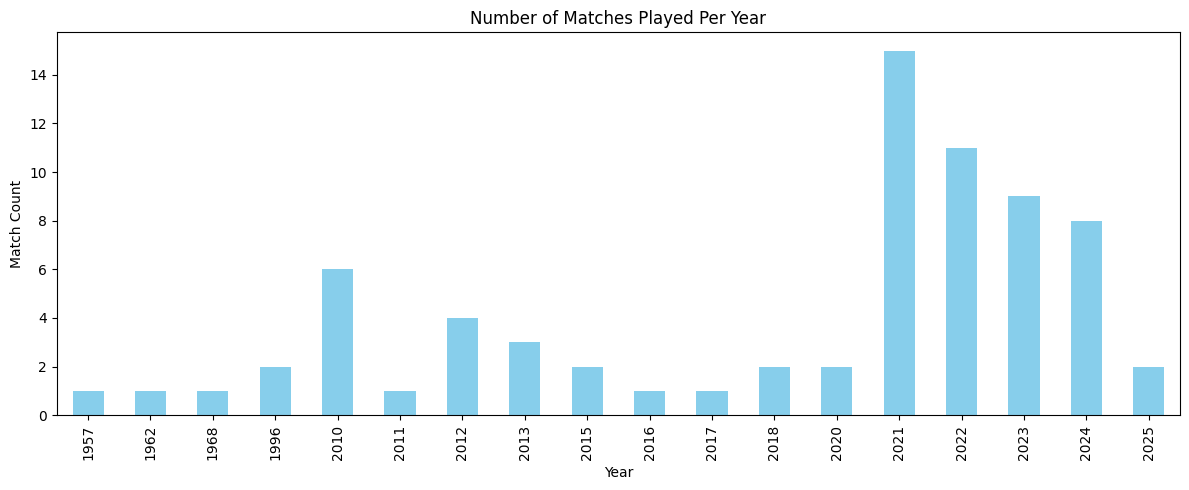

In [45]:
                                  #MATCHES OVER TIME  


import matplotlib.pyplot as plt

df_m['Year'] = df_m['Date'].dt.year
matches_per_year = df_m['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
matches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played Per Year')
plt.xlabel('Year')
plt.ylabel('Match Count')
plt.tight_layout()
plt.show()




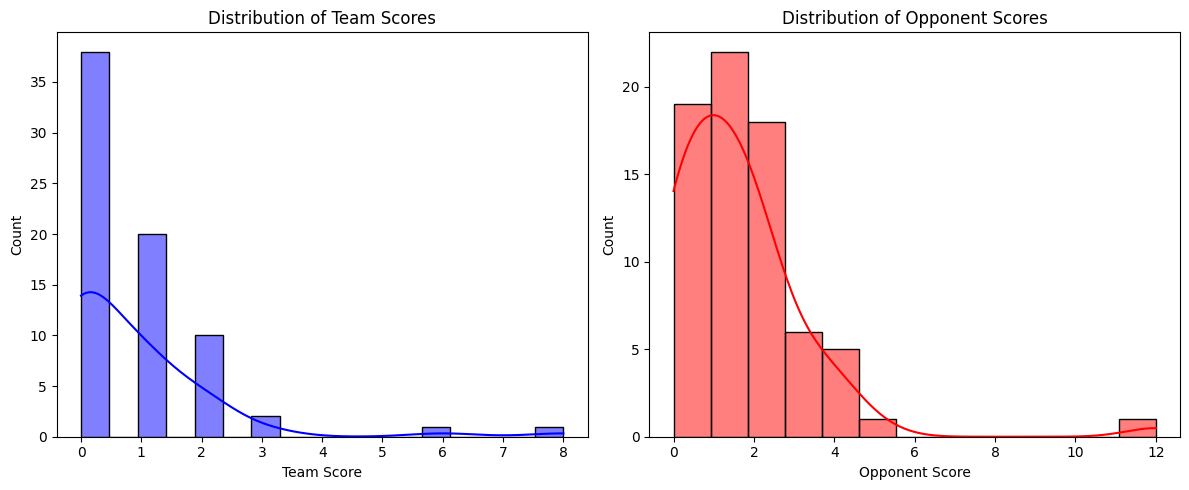

In [49]:
                              #Distributions of Score


import matplotlib.pyplot as plt
import seaborn as sns 


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_m['Team Score'], kde=True, color='blue')
plt.title('Distribution of Team Scores')

plt.subplot(1, 2, 2)
sns.histplot(df_m['Opponent Score'], kde=True, color='red')
plt.title('Distribution of Opponent Scores')

plt.tight_layout()
plt.show()


In [51]:
df_m

,Date,Opponent,Team Score,Opponent Score,Result,Venue,Competition,Year
0,1957-01-01,Northern Rhodesia,0,5,Loss,Unknown,Friendly (First International),1957
1,1962-01-01,Ghana,0,12,Loss,Unknown,Friendly,1962
2,1968-01-01,Botswana,8,1,Win,Unknown,Friendly,1968
3,1996-06-02,South Africa,0,3,Loss,Away,World Cup Qualifier,1996
4,1996-07-07,Zambia,1,1,Draw,Home,Friendly,1996
...,...,...,...,...,...,...,...,...
67,2024-10-11,Senegal,0,4,Loss,Away,AFCON 2025 Qualifier,2024
68,2024-11-14,Burundi,0,0,Draw,Home,AFCON 2025 Qualifier,2024
69,2024-11-18,Burkina Faso,0,1,Loss,Away,AFCON 2025 Qualifier,2024
70,2025-03-02,Comoros,2,0,Win,Away,Friendly,2025


In [55]:
df_m["Result"].value_counts()

Result
Loss    35
Draw    22
Win     15
Name: count, dtype: int64

C:\Users\Sridhar\AppData\Local\Temp\ipykernel_14828\1907351812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df_m, palette='viridis')


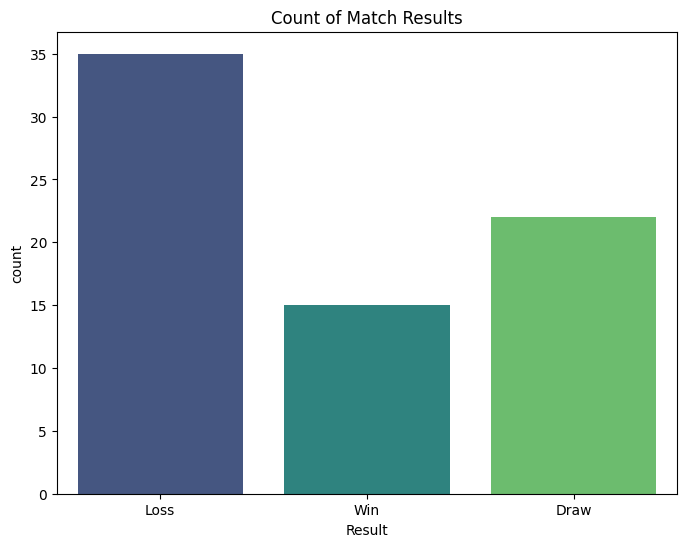

In [57]:
                             #COUNT OF MATCHES RESULTS                        

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df_m, palette='viridis')
plt.title('Count of Match Results')
plt.show()

C:\Users\Sridhar\AppData\Local\Temp\ipykernel_14828\1261358189.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Venue', data=df_m, palette='magma')


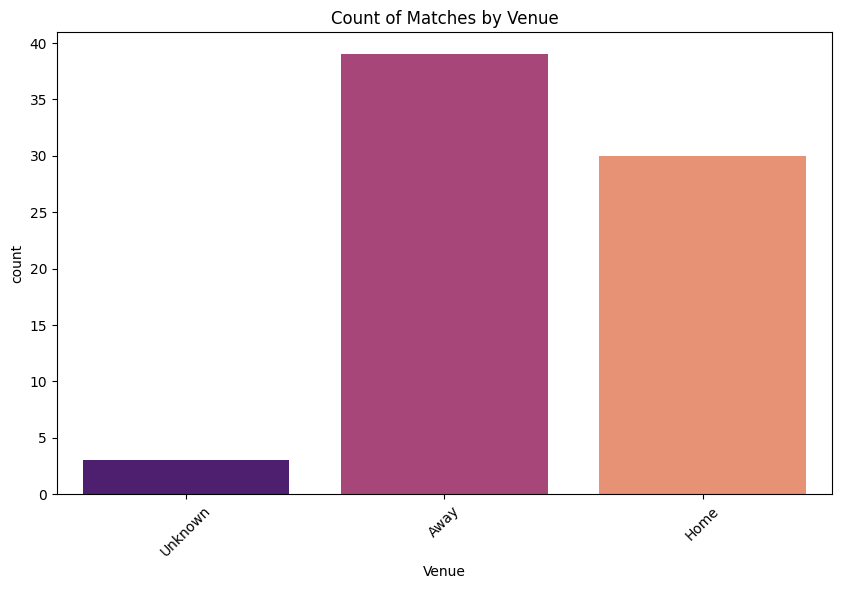

In [59]:
                                     #COUNT OF MATCHES BY VENUE


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Venue', data=df_m, palette='magma')
plt.title('Count of Matches by Venue')
plt.xticks(rotation=45)
plt.show()



In [63]:
                               #Top 10 Highest Scoring Matches By Team Score

top_scoring_matches = df_m.sort_values(by='Team Score', ascending=False).head(10)

print(top_scoring_matches[['Team Score', 'Competition']])


    Team Score           Competition
2            8              Friendly
9            6       AFCON Qualifier
64           3   World Cup Qualifier
66           3  AFCON 2025 Qualifier
8            2       AFCON Qualifier
20           2       AFCON Qualifier
50           2            COSAFA Cup
10           2              Friendly
59           2       AFCON Qualifier
31           2            COSAFA Cup


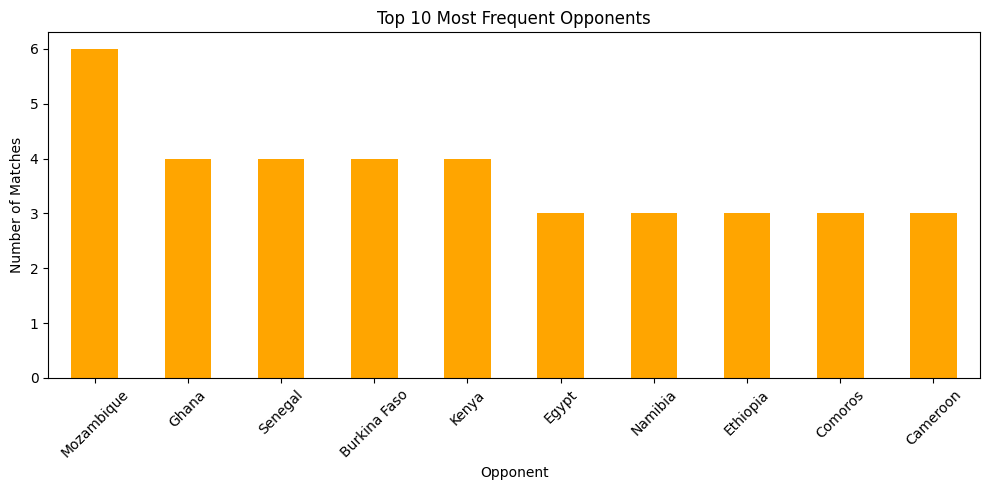

In [67]:
                                       #Most Frequent Opponents

import matplotlib.pyplot as plt
import seaborn as sns

top_opponents = df_m['Opponent'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_opponents.plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequent Opponents')
plt.xlabel('Opponent')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Sridhar\AppData\Local\Temp\ipykernel_14828\1442795929.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=competition_counts.index, y=competition_counts.values, palette='coolwarm')


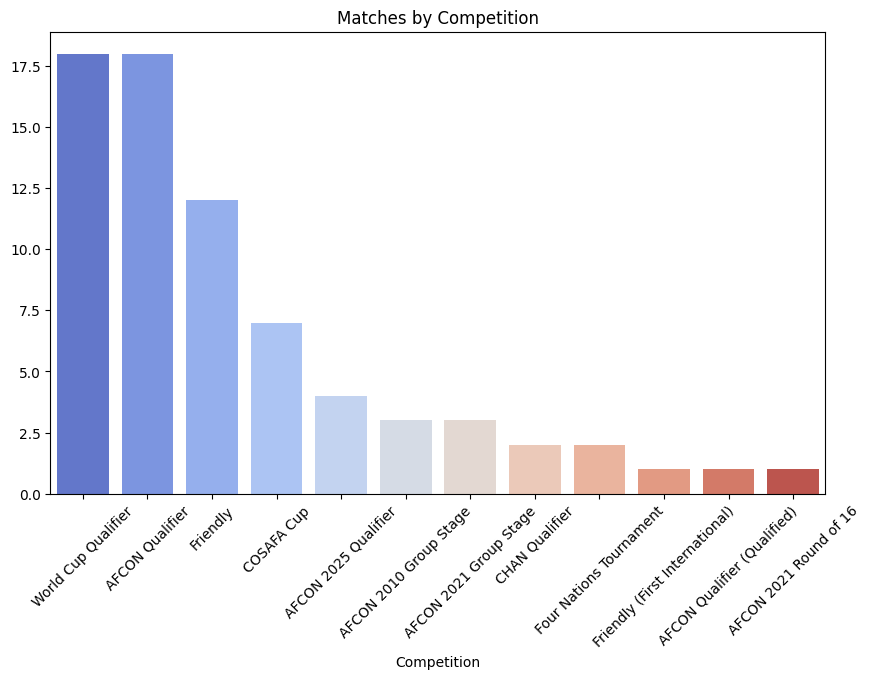

In [71]:
                                    #MATCHES BY COMPETITION 


import matplotlib.pyplot as plt
import seaborn as sns 


plt.figure(figsize=(10, 6))
competition_counts = df_m['Competition'].value_counts()
sns.barplot(x=competition_counts.index, y=competition_counts.values, palette='coolwarm')
plt.title('Matches by Competition')
plt.xticks(rotation=45)
plt.show()


